# HR Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

Importing required modules

As we want to find employee attrition we want to build classification model

In [2]:
hr=pd.read_csv(r"C:\Users\Minhaj\Downloads\ibm-hr-analytics-employee-attrition-performance.zip")

Importing Dataset

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Sample data of dataset

In [4]:
hr.shape

(1470, 35)

Dataset have 1470 rows and 35 columns

In [5]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Columns of our dataset

In [6]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Datatypes of dataset it contains categorical integer datatypes

In [7]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing values in dataset

In [8]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Statistical summary of dataset here we can observe minimum age is 18 and maximum age is 60

In [9]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
categorical=[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
              'Over18','OverTime']].copy()

Stored categorical tables in another list

In [11]:
categorical

[['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime']]

categorical list

# Visualization

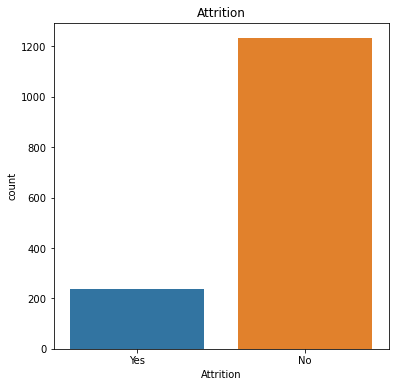

No     1233
Yes     237
Name: Attrition, dtype: int64


In [12]:
plt.figure(figsize=(6,6))
sns.countplot('Attrition',data=hr)
plt.title("Attrition")
plt.show()
print(hr['Attrition'].value_counts())

count of of our target variable attrition.WE CAN OBSERVE IMBALANCE OF THE class

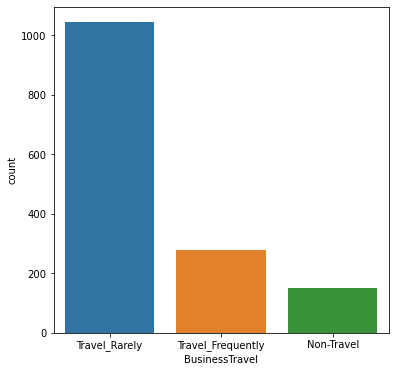

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [13]:
plt.figure(figsize=(6,6))
sns.countplot('BusinessTravel',data=hr)
plt.show()
print(hr['BusinessTravel'].value_counts())

Here we have 3 categories in business travel column

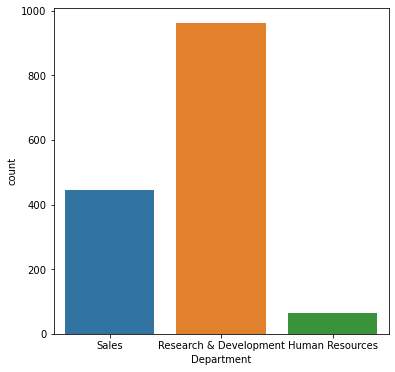

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [14]:
plt.figure(figsize=(6,6))
sns.countplot('Department',data=hr)
plt.show()
print(hr['Department'].value_counts())

department column have 3 class hr department ave less value which is 63

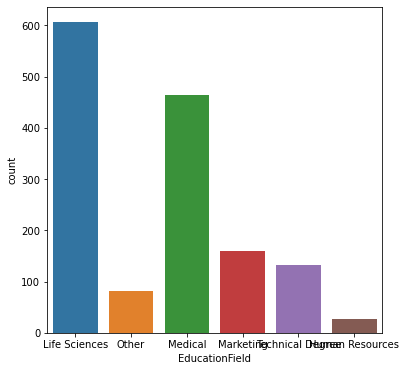

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [15]:
plt.figure(figsize=(6,6))
sns.countplot('EducationField',data=hr)
plt.show()
print(hr['EducationField'].value_counts())

Education fileds contain 6 classes

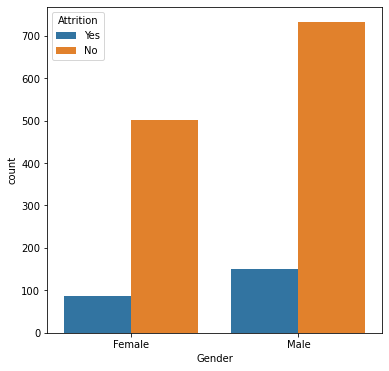

Male      882
Female    588
Name: Gender, dtype: int64


In [16]:
plt.figure(figsize=(6,6))
sns.countplot('Gender',data=hr,hue='Attrition')
plt.show()
print(hr['Gender'].value_counts())

Attrition in both male and female

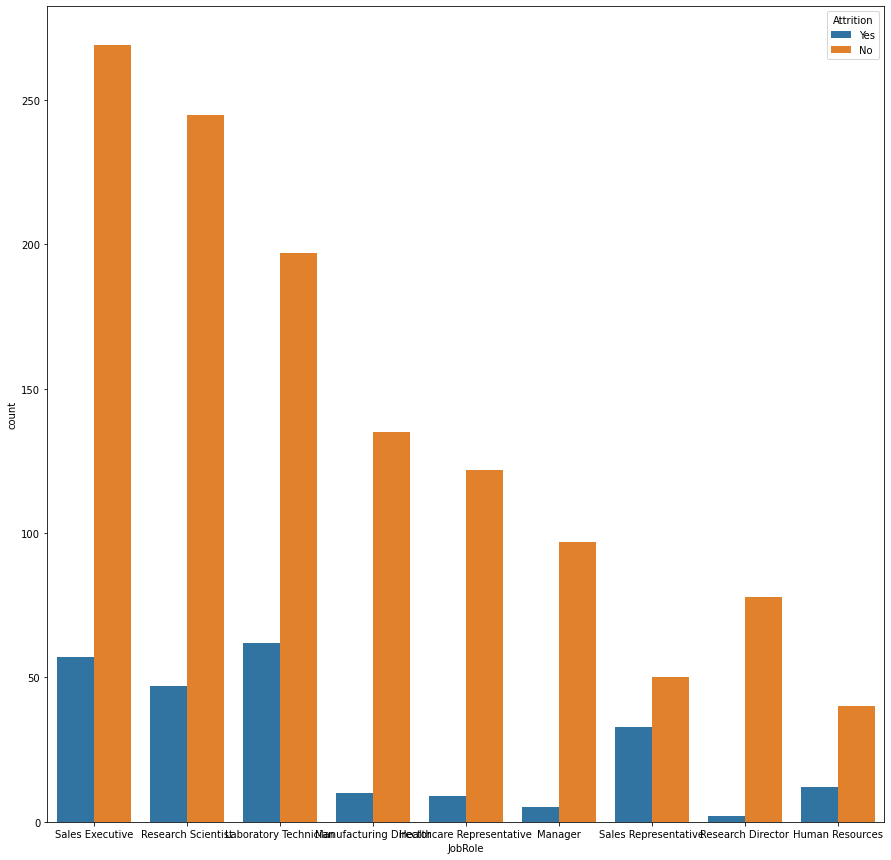

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [17]:
plt.figure(figsize=(15,15))
sns.countplot('JobRole',data=hr,hue='Attrition')
plt.show()
print(hr['JobRole'].value_counts())

Here sales executives are more than other job roles,most of attrition where in labortary technician job role

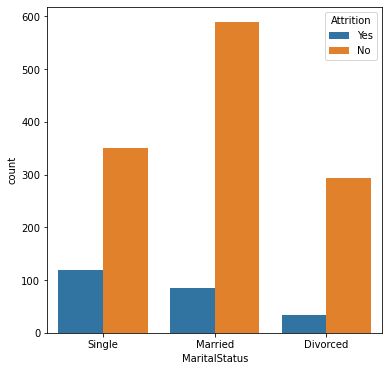

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [18]:
plt.figure(figsize=(6,6))
sns.countplot('MaritalStatus',data=hr,hue='Attrition')
plt.show()
print(hr['MaritalStatus'].value_counts())

Most of the employees are married also attritions are high in married employees while divorced employees have low attrition

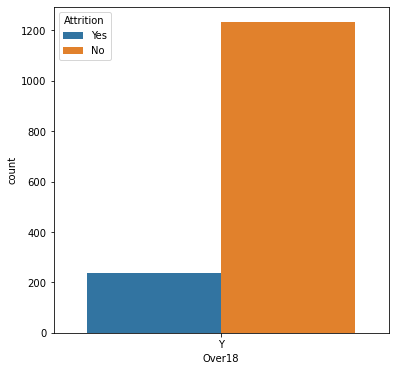

Y    1470
Name: Over18, dtype: int64


In [19]:
plt.figure(figsize=(6,6))
sns.countplot('Over18',data=hr,hue='Attrition')
plt.show()
print(hr['Over18'].value_counts())

Low attrition in over 18

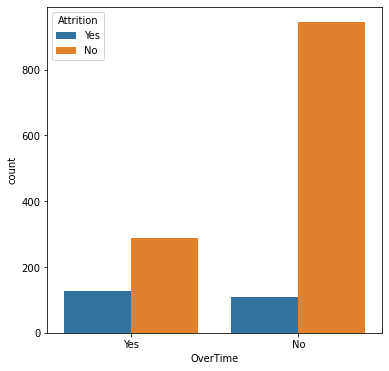

No     1054
Yes     416
Name: OverTime, dtype: int64


In [20]:
plt.figure(figsize=(6,6))
sns.countplot('OverTime',data=hr,hue='Attrition')
plt.show()
print(hr['OverTime'].value_counts())

Employees work for overtime will have the possibility of low attrition

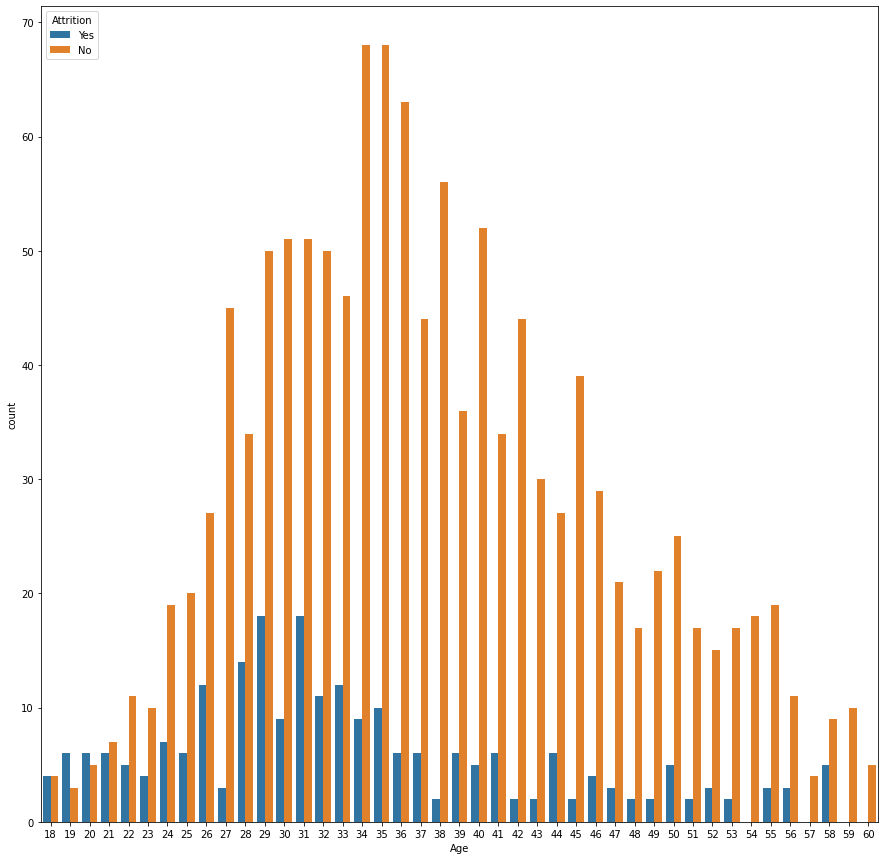

In [21]:
plt.figure(figsize=(15,15))
sns.countplot('Age',hue='Attrition',data=hr)
plt.show()

Around the age of 29 and 31 have high attrition

In [22]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

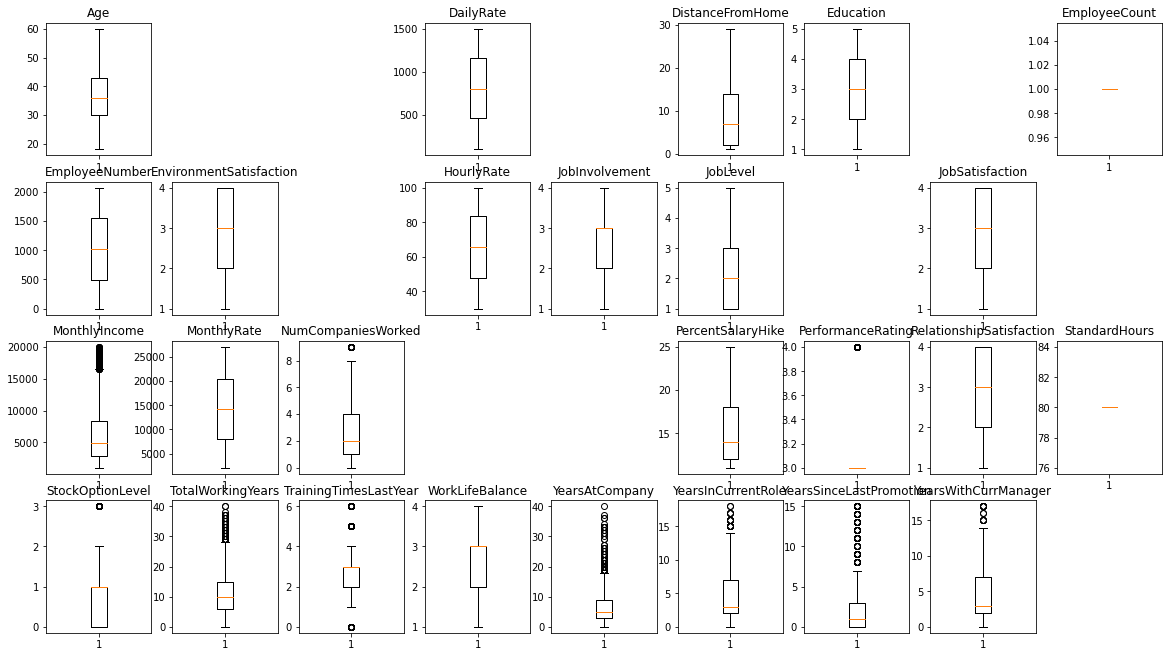

In [25]:
plt.figure(figsize=(20,20))
for i in range(len(hr.columns)):
    if hr.dtypes[i]!='object':
        plt.subplot(7,9,i+1)
        plt.boxplot(hr[hr.columns[i]])
        plt.title(hr.columns[i])
plt.show()

Detection of outliers

# Data Cleaning

In [26]:
hr['StandardHours'].unique()

array([80], dtype=int64)

Have only one value 

In [27]:
hr['EmployeeCount'].unique()

array([1], dtype=int64)

here also only one value count 1

In [28]:
hr['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

Here it is ordinal data and unique value it is not affect the prediction

In [3]:
hr.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1,inplace=True)

Dropped the unwanted columns here which will not affect for  our prediction,all age is greater than 18 so 'Over18' is unwanted column which we can drop

# Correlation

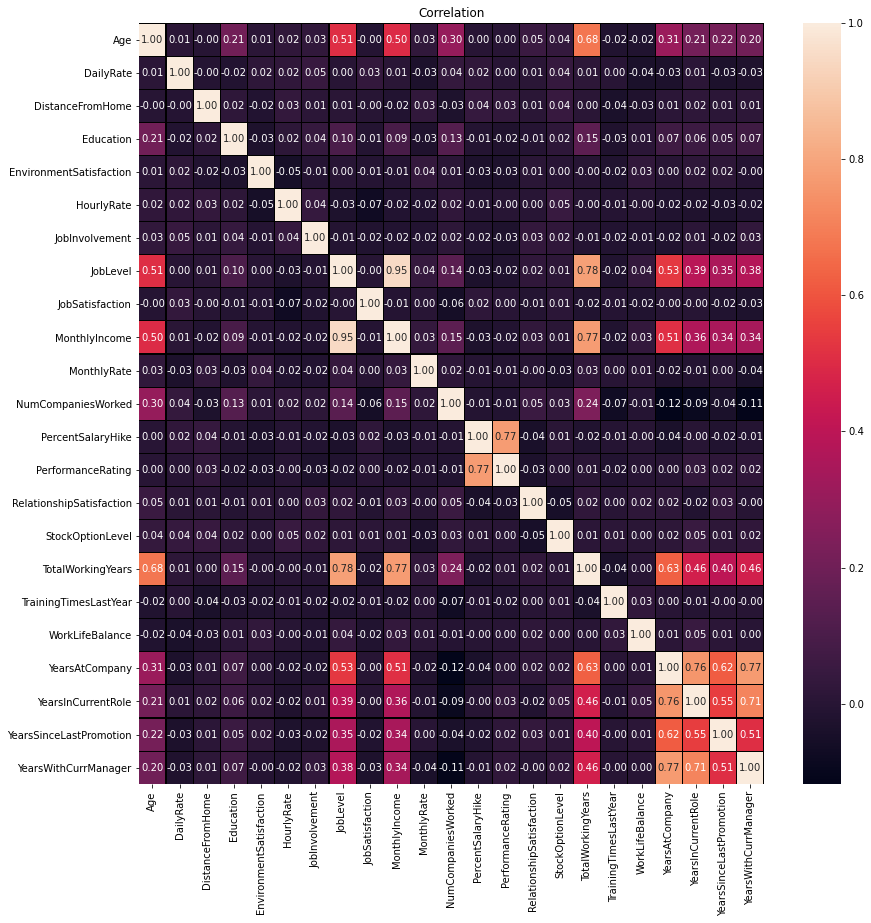

In [30]:
plt.figure(figsize=(14,14))
sns.heatmap(hr.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.title("Correlation")
plt.show()

Here age have correlation between total wroking years,joblevel have correlation betweenjoblevel and also toatl working years is highly correlated to monthly income.
And monthly income have 95% of correlation with job level it means high job level increase in salary.

# Data Preprocessing

In [31]:
categorical

[['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime']]

We want to encode the categorical table here we have dropped over 18 column so we want to encode other columns

# Encoding

In [4]:
le=LabelEncoder()
var=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
#storing column names to encode

for i in var:
    hr[i]=le.fit_transform(hr[i])

Encoded columns

# Seperating features and Target

In [5]:
x=hr.drop('Attrition', axis = 1)
y = hr['Attrition']

Seperated  Features and Target

In [34]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


Sample data of features

In [35]:
pd.DataFrame(y)

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


Target column

# Scaling

In [6]:
sc=StandardScaler()
x=sc.fit_transform(x)

Scaled Our Fetaures

# Balancing Class in target variable

# Over Sampling

In [7]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced Using smote

In [38]:
y.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

Target varibale balanced

# Model Building

In [39]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.8025959978366685
At random state 0,the testing accuracy is:- 0.7763371150729336


At random state 1,the training accuarcy is:- 0.8025959978366685
At random state 1,the testing accuracy is:- 0.7876823338735819


At random state 2,the training accuarcy is:- 0.8107084910762574
At random state 2,the testing accuracy is:- 0.7957860615883307


At random state 3,the training accuarcy is:- 0.8058409951325041
At random state 3,the testing accuracy is:- 0.7941653160453809


At random state 4,the training accuarcy is:- 0.8053001622498648
At random state 4,the testing accuracy is:- 0.7909238249594813


At random state 5,the training accuarcy is:- 0.8074634937804218
At random state 5,the testing accuracy is:- 0.7990275526742301


At random state 6,the training accuarcy is:- 0.8112493239588967
At random state 6,the testing accuracy is:- 0.7763371150729336


At random state 7,the training accuarcy is:- 0.7998918334234721
At random state 7,the testing acc

At random state 67,the training accuarcy is:- 0.8015143320713899
At random state 67,the testing accuracy is:- 0.7941653160453809


At random state 68,the training accuarcy is:- 0.7961060032449973
At random state 68,the testing accuracy is:- 0.7957860615883307


At random state 68 model performs well
At random state 69,the training accuarcy is:- 0.809626825310979
At random state 69,the testing accuracy is:- 0.7844408427876823


At random state 70,the training accuarcy is:- 0.803677663601947
At random state 70,the testing accuracy is:- 0.7811993517017828


At random state 71,the training accuarcy is:- 0.7988101676581936
At random state 71,the testing accuracy is:- 0.7925445705024311


At random state 72,the training accuarcy is:- 0.7901568415359654
At random state 72,the testing accuracy is:- 0.8022690437601296


At random state 73,the training accuarcy is:- 0.7988101676581936
At random state 73,the testing accuracy is:- 0.773095623987034


At random state 74,the training accuarcy is:- 0

At random state 130,the testing accuracy is:- 0.779578606158833


At random state 131,the training accuarcy is:- 0.8031368307193077
At random state 131,the testing accuracy is:- 0.7844408427876823


At random state 132,the training accuarcy is:- 0.8042184964845862
At random state 132,the testing accuracy is:- 0.8055105348460292


At random state 133,the training accuarcy is:- 0.7971876690102758
At random state 133,the testing accuracy is:- 0.8103727714748784


At random state 134,the training accuarcy is:- 0.7982693347755544
At random state 134,the testing accuracy is:- 0.807131280388979


At random state 135,the training accuarcy is:- 0.7998918334234721
At random state 135,the testing accuracy is:- 0.7860615883306321


At random state 136,the training accuarcy is:- 0.8074634937804218
At random state 136,the testing accuracy is:- 0.7763371150729336


At random state 137,the training accuarcy is:- 0.8053001622498648
At random state 137,the testing accuracy is:- 0.8038897893030794


At r

At random state 194,the testing accuracy is:- 0.773095623987034


At random state 195,the training accuarcy is:- 0.7993510005408329
At random state 195,the testing accuracy is:- 0.7828200972447326


At random state 196,the training accuarcy is:- 0.8020551649540292
At random state 196,the testing accuracy is:- 0.7698541329011345


At random state 197,the training accuarcy is:- 0.8004326663061114
At random state 197,the testing accuracy is:- 0.7909238249594813


At random state 198,the training accuarcy is:- 0.8085451595457004
At random state 198,the testing accuracy is:- 0.7747163695299838


At random state 199,the training accuarcy is:- 0.7939426717144402
At random state 199,the testing accuracy is:- 0.8168557536466775




Splitted data into trained and test data,finding best random state for logistic regression

In [40]:
l

[9,
 10,
 12,
 15,
 21,
 32,
 36,
 49,
 52,
 53,
 54,
 56,
 62,
 64,
 68,
 74,
 86,
 87,
 95,
 97,
 102,
 103,
 107,
 108,
 113,
 125,
 128,
 138,
 143,
 153,
 165,
 167,
 169,
 171,
 175,
 183,
 191]

List of best random states

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=191)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       297
           1       0.81      0.80      0.80       320

    accuracy                           0.80       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.80      0.80      0.80       617

[[235  62]
 [ 64 256]]


Applied best random states and print accuracy score and confusion matrix

In [57]:
dt=DecisionTreeClassifier()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.8314424635332253


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.8379254457050244


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.8525121555915721


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.8298217179902755


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.8606158833063209


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.8363047001620746


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8168557536466775


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.8622366288492707


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy 

At random state 73,the training accuarcy is:- 1.0
At random state 73,the testing accuracy is:- 0.8622366288492707


At random state 74,the training accuarcy is:- 1.0
At random state 74,the testing accuracy is:- 0.8249594813614263


At random state 75,the training accuarcy is:- 1.0
At random state 75,the testing accuracy is:- 0.8427876823338736


At random state 76,the training accuarcy is:- 1.0
At random state 76,the testing accuracy is:- 0.8622366288492707


At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.873581847649919


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.8427876823338736


At random state 79,the training accuarcy is:- 1.0
At random state 79,the testing accuracy is:- 0.8427876823338736


At random state 80,the training accuarcy is:- 1.0
At random state 80,the testing accuracy is:- 0.839546191247974


At random state 81,the training accuarcy is:- 1.0
At random state 81,the t

At random state 147,the training accuarcy is:- 1.0
At random state 147,the testing accuracy is:- 0.8606158833063209


At random state 148,the training accuarcy is:- 1.0
At random state 148,the testing accuracy is:- 0.833063209076175


At random state 149,the training accuarcy is:- 1.0
At random state 149,the testing accuracy is:- 0.8622366288492707


At random state 150,the training accuarcy is:- 1.0
At random state 150,the testing accuracy is:- 0.8638573743922204


At random state 151,the training accuarcy is:- 1.0
At random state 151,the testing accuracy is:- 0.8654781199351702


At random state 152,the training accuarcy is:- 1.0
At random state 152,the testing accuracy is:- 0.8379254457050244


At random state 153,the training accuarcy is:- 1.0
At random state 153,the testing accuracy is:- 0.8606158833063209


At random state 154,the training accuarcy is:- 1.0
At random state 154,the testing accuracy is:- 0.86709886547812


At random state 155,the training accuarcy is:- 1.0
At rando

Splitted data into train and test data,finding best random states for decision tree classifier

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=167)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_d=classification_report(y_test,preddt)
print(acc_d)
print(confusion_matrix(y_test,preddt))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       300
           1       0.86      0.87      0.87       317

    accuracy                           0.86       617
   macro avg       0.86      0.86      0.86       617
weighted avg       0.86      0.86      0.86       617

[[254  46]
 [ 40 277]]


Select best random state and fit the trained data and find accuracyscore and confusion matrix

In [52]:
#naive bayes bernoulli 
bnb=BernoulliNB()
b=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    bnb.fit(x_train,y_train)
    pred_train=bnb.predict(x_train)
    pred_test=bnb.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        b.append(i)

At random state 0,the training accuarcy is:- 0.7441860465116279
At random state 0,the testing accuracy is:- 0.7293354943273906


At random state 1,the training accuarcy is:- 0.7533802055164954
At random state 1,the testing accuracy is:- 0.7439222042139384


At random state 2,the training accuarcy is:- 0.7452677122769065
At random state 2,the testing accuracy is:- 0.766612641815235


At random state 3,the training accuarcy is:- 0.7452677122769065
At random state 3,the testing accuracy is:- 0.7228525121555915


At random state 4,the training accuarcy is:- 0.7490535424553812
At random state 4,the testing accuracy is:- 0.7325769854132901


At random state 5,the training accuarcy is:- 0.7452677122769065
At random state 5,the testing accuracy is:- 0.7504051863857374


At random state 5 model performs well
At random state 6,the training accuarcy is:- 0.7512168739859384
At random state 6,the testing accuracy is:- 0.7552674230145867


At random state 7,the training accuarcy is:- 0.7506760411032

At random state 60,the testing accuracy is:- 0.747163695299838


At random state 61,the training accuarcy is:- 0.7485127095727421
At random state 61,the testing accuracy is:- 0.7406807131280388


At random state 62,the training accuarcy is:- 0.7512168739859384
At random state 62,the testing accuracy is:- 0.7179902755267423


At random state 63,the training accuarcy is:- 0.7474310438074635
At random state 63,the testing accuracy is:- 0.7487844408427877


At random state 63 model performs well
At random state 64,the training accuarcy is:- 0.7452677122769065
At random state 64,the testing accuracy is:- 0.7325769854132901


At random state 65,the training accuarcy is:- 0.7533802055164954
At random state 65,the testing accuracy is:- 0.7260940032414911


At random state 66,the training accuarcy is:- 0.7447268793942672
At random state 66,the testing accuracy is:- 0.7358184764991896


At random state 66 model performs well
At random state 67,the training accuarcy is:- 0.7420227149810709
At ran

At random state 120,the training accuarcy is:- 0.7533802055164954
At random state 120,the testing accuracy is:- 0.7423014586709886


At random state 121,the training accuarcy is:- 0.7420227149810709
At random state 121,the testing accuracy is:- 0.7439222042139384


At random state 121 model performs well
At random state 122,the training accuarcy is:- 0.7474310438074635
At random state 122,the testing accuracy is:- 0.7309562398703403


At random state 123,the training accuarcy is:- 0.7571660356949702
At random state 123,the testing accuracy is:- 0.7358184764991896


At random state 124,the training accuarcy is:- 0.7447268793942672
At random state 124,the testing accuracy is:- 0.7568881685575365


At random state 125,the training accuarcy is:- 0.7344510546241212
At random state 125,the testing accuracy is:- 0.7649918962722853


At random state 126,the training accuarcy is:- 0.7463493780421849
At random state 126,the testing accuracy is:- 0.773095623987034


At random state 127,the traini

At random state 181,the training accuarcy is:- 0.7474310438074635
At random state 181,the testing accuracy is:- 0.7390599675850892


At random state 182,the training accuarcy is:- 0.7452677122769065
At random state 182,the testing accuracy is:- 0.747163695299838


At random state 182 model performs well
At random state 183,the training accuarcy is:- 0.7479718766901028
At random state 183,the testing accuracy is:- 0.7163695299837926


At random state 184,the training accuarcy is:- 0.7452677122769065
At random state 184,the testing accuracy is:- 0.7520259319286872


At random state 184 model performs well
At random state 185,the training accuarcy is:- 0.7533802055164954
At random state 185,the testing accuracy is:- 0.7017828200972447


At random state 186,the training accuarcy is:- 0.7420227149810709
At random state 186,the testing accuracy is:- 0.7633711507293355


At random state 187,the training accuarcy is:- 0.7490535424553812
At random state 187,the testing accuracy is:- 0.768233387

Splitted data into train and test,finding best random states for bernoulli naive bayes

In [53]:
b

[5,
 13,
 15,
 21,
 22,
 29,
 32,
 44,
 50,
 52,
 56,
 63,
 66,
 67,
 74,
 75,
 81,
 90,
 91,
 100,
 108,
 116,
 121,
 128,
 132,
 133,
 134,
 135,
 141,
 160,
 164,
 169,
 182,
 184,
 190,
 197]

List of best random states

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=197)
bnb.fit(x_train,y_train)
predbnb=bnb.predict(x_test)
acc_b=classification_report(y_test,predbnb)
print(acc_b)
print(confusion_matrix(y_test,predbnb))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       305
           1       0.76      0.75      0.75       312

    accuracy                           0.75       617
   macro avg       0.75      0.75      0.75       617
weighted avg       0.75      0.75      0.75       617

[[230  75]
 [ 79 233]]


Select best random state and fit the train data and find accuarcy and confusion matrix

In [64]:
#Kneighbors classifier 
kn=KNeighborsClassifier()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training accuarcy is:- 0.8750676041103299
At random state 0,the testing accuracy is:- 0.820097244732577


At random state 1,the training accuarcy is:- 0.8658734451054624
At random state 1,the testing accuracy is:- 0.807131280388979


At random state 2,the training accuarcy is:- 0.8702001081665766
At random state 2,the testing accuracy is:- 0.8087520259319287


At random state 3,the training accuarcy is:- 0.8653326122228231
At random state 3,the testing accuracy is:- 0.8022690437601296


At random state 4,the training accuarcy is:- 0.8653326122228231
At random state 4,the testing accuracy is:- 0.7844408427876823


At random state 5,the training accuarcy is:- 0.8729042725797729
At random state 5,the testing accuracy is:- 0.813614262560778


At random state 6,the training accuarcy is:- 0.8680367766360195
At random state 6,the testing accuracy is:- 0.826580226904376


At random state 7,the training accuarcy is:- 0.8723634396971336
At random state 7,the testing accurac

At random state 63,the training accuarcy is:- 0.8647917793401839
At random state 63,the testing accuracy is:- 0.8346839546191248


At random state 64,the training accuarcy is:- 0.8729042725797729
At random state 64,the testing accuracy is:- 0.8119935170178282


At random state 65,the training accuarcy is:- 0.8696592752839373
At random state 65,the testing accuracy is:- 0.8119935170178282


At random state 66,the training accuarcy is:- 0.8626284478096268
At random state 66,the testing accuracy is:- 0.7957860615883307


At random state 67,the training accuarcy is:- 0.8658734451054624
At random state 67,the testing accuracy is:- 0.813614262560778


At random state 68,the training accuarcy is:- 0.8642509464575446
At random state 68,the testing accuracy is:- 0.766612641815235


At random state 69,the training accuarcy is:- 0.8642509464575446
At random state 69,the testing accuracy is:- 0.7876823338735819


At random state 70,the training accuarcy is:- 0.869118442401298
At random state 70,th

At random state 126,the training accuarcy is:- 0.8599242833964305
At random state 126,the testing accuracy is:- 0.8217179902755267


At random state 127,the training accuarcy is:- 0.8626284478096268
At random state 127,the testing accuracy is:- 0.8087520259319287


At random state 128,the training accuarcy is:- 0.8658734451054624
At random state 128,the testing accuracy is:- 0.8006482982171799


At random state 129,the training accuarcy is:- 0.8577609518658734
At random state 129,the testing accuracy is:- 0.8022690437601296


At random state 130,the training accuarcy is:- 0.8664142779881017
At random state 130,the testing accuracy is:- 0.7990275526742301


At random state 131,the training accuarcy is:- 0.8647917793401839
At random state 131,the testing accuracy is:- 0.8055105348460292


At random state 132,the training accuarcy is:- 0.8696592752839373
At random state 132,the testing accuracy is:- 0.8217179902755267


At random state 133,the training accuarcy is:- 0.8664142779881017
At 

At random state 188,the training accuarcy is:- 0.861005949161709
At random state 188,the testing accuracy is:- 0.8103727714748784


At random state 189,the training accuarcy is:- 0.8593834505137913
At random state 189,the testing accuracy is:- 0.8411669367909238


At random state 190,the training accuarcy is:- 0.8674959437533802
At random state 190,the testing accuracy is:- 0.8055105348460292


At random state 191,the training accuarcy is:- 0.8658734451054624
At random state 191,the testing accuracy is:- 0.820097244732577


At random state 192,the training accuarcy is:- 0.869118442401298
At random state 192,the testing accuracy is:- 0.813614262560778


At random state 193,the training accuarcy is:- 0.8664142779881017
At random state 193,the testing accuracy is:- 0.7893030794165316


At random state 194,the training accuarcy is:- 0.8696592752839373
At random state 194,the testing accuracy is:- 0.8055105348460292


At random state 195,the training accuarcy is:- 0.8658734451054624
At rand

Splitted data into train test data,finding best random states for kneighbors classifier

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=197)
kn.fit(x_train,y_train)
predknn=kn.predict(x_test)
acc_k=classification_report(y_test,predknn)
print(acc_k)
print(confusion_matrix(y_test,predknn))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       305
           1       0.78      0.97      0.86       312

    accuracy                           0.85       617
   macro avg       0.87      0.84      0.84       617
weighted avg       0.87      0.85      0.84       617

[[219  86]
 [  9 303]]


Selected best random states and fit the train data and find accuracy and confusion matrix

# Ensemble Technique

In [66]:
#Random Forest classifier 
rf=RandomForestClassifier()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.9384116693679092


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.9076175040518638


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.9481361426256077


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.946515397082658


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.93354943273906


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.9254457050243112


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.9270664505672609


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.9367909238249594


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy is:

At random state 71,the training accuarcy is:- 1.0
At random state 71,the testing accuracy is:- 0.9367909238249594


At random state 72,the training accuarcy is:- 1.0
At random state 72,the testing accuracy is:- 0.9448946515397083


At random state 73,the training accuarcy is:- 1.0
At random state 73,the testing accuracy is:- 0.940032414910859


At random state 74,the training accuarcy is:- 1.0
At random state 74,the testing accuracy is:- 0.9367909238249594


At random state 75,the training accuarcy is:- 1.0
At random state 75,the testing accuracy is:- 0.9205834683954619


At random state 76,the training accuarcy is:- 1.0
At random state 76,the testing accuracy is:- 0.9254457050243112


At random state 77,the training accuarcy is:- 1.0
At random state 77,the testing accuracy is:- 0.9270664505672609


At random state 78,the training accuarcy is:- 1.0
At random state 78,the testing accuracy is:- 0.9319286871961102


At random state 79,the training accuarcy is:- 1.0
At random state 79,the 

At random state 142,the training accuarcy is:- 1.0
At random state 142,the testing accuracy is:- 0.9367909238249594


At random state 143,the training accuarcy is:- 1.0
At random state 143,the testing accuracy is:- 0.93354943273906


At random state 144,the training accuarcy is:- 1.0
At random state 144,the testing accuracy is:- 0.9205834683954619


At random state 145,the training accuarcy is:- 1.0
At random state 145,the testing accuracy is:- 0.9286871961102107


At random state 146,the training accuarcy is:- 1.0
At random state 146,the testing accuracy is:- 0.9303079416531604


At random state 147,the training accuarcy is:- 1.0
At random state 147,the testing accuracy is:- 0.9513776337115073


At random state 148,the training accuarcy is:- 1.0
At random state 148,the testing accuracy is:- 0.9367909238249594


At random state 149,the training accuarcy is:- 1.0
At random state 149,the testing accuracy is:- 0.9189627228525121


At random state 150,the training accuarcy is:- 1.0
At rand

Splitted data into tain and test data,finding best random state for random forest classifier

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=197)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_r=classification_report(y_test,predrf)
print(acc_r)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       305
           1       0.97      0.91      0.94       312

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617

[[297   8]
 [ 29 283]]


Apply the best random state and fit the train data and find accuracy score and confusion matrix

In [8]:
#adaboostclassifier
ad=AdaBoostClassifier()
a=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    ad.fit(x_train,y_train)
    pred_train=ad.predict(x_train)
    pred_test=ad.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        a.append(i)

At random state 0,the training accuarcy is:- 0.9259058950784208
At random state 0,the testing accuracy is:- 0.8962722852512156


At random state 1,the training accuarcy is:- 0.9340183883180098
At random state 1,the testing accuracy is:- 0.8962722852512156


At random state 2,the training accuarcy is:- 0.914007571660357
At random state 2,the testing accuracy is:- 0.9108589951377634


At random state 2 model performs well
At random state 3,the training accuarcy is:- 0.9296917252568956
At random state 3,the testing accuracy is:- 0.9092382495948136


At random state 4,the training accuarcy is:- 0.9259058950784208
At random state 4,the testing accuracy is:- 0.899513776337115


At random state 5,the training accuarcy is:- 0.9280692266089778
At random state 5,the testing accuracy is:- 0.9076175040518638


At random state 6,the training accuarcy is:- 0.9307733910221742
At random state 6,the testing accuracy is:- 0.8816855753646677


At random state 7,the training accuarcy is:- 0.92861005949161

At random state 61,the training accuarcy is:- 0.9248242293131422
At random state 61,the testing accuracy is:- 0.8897893030794165


At random state 62,the training accuarcy is:- 0.9275283937263386
At random state 62,the testing accuracy is:- 0.8719611021069692


At random state 63,the training accuarcy is:- 0.9237425635478637
At random state 63,the testing accuracy is:- 0.9108589951377634


At random state 64,the training accuarcy is:- 0.92644672796106
At random state 64,the testing accuracy is:- 0.9157212317666127


At random state 65,the training accuarcy is:- 0.9291508923742564
At random state 65,the testing accuracy is:- 0.9011345218800648


At random state 66,the training accuarcy is:- 0.9232017306652245
At random state 66,the testing accuracy is:- 0.8897893030794165


At random state 67,the training accuarcy is:- 0.9259058950784208
At random state 67,the testing accuracy is:- 0.9092382495948136


At random state 68,the training accuarcy is:- 0.9210383991346673
At random state 68,t

At random state 122,the training accuarcy is:- 0.9237425635478637
At random state 122,the testing accuracy is:- 0.9092382495948136


At random state 123,the training accuarcy is:- 0.9323958896700919
At random state 123,the testing accuracy is:- 0.899513776337115


At random state 124,the training accuarcy is:- 0.9194159004867496
At random state 124,the testing accuracy is:- 0.8962722852512156


At random state 125,the training accuarcy is:- 0.9177934018388318
At random state 125,the testing accuracy is:- 0.9189627228525121


At random state 125 model performs well
At random state 126,the training accuarcy is:- 0.9323958896700919
At random state 126,the testing accuracy is:- 0.9092382495948136


At random state 127,the training accuarcy is:- 0.9215792320173066
At random state 127,the testing accuracy is:- 0.9173419773095624


At random state 127 model performs well
At random state 128,the training accuarcy is:- 0.9286100594916171
At random state 128,the testing accuracy is:- 0.910858995

At random state 183,the training accuarcy is:- 0.914007571660357
At random state 183,the testing accuracy is:- 0.9254457050243112


At random state 184,the training accuarcy is:- 0.9296917252568956
At random state 184,the testing accuracy is:- 0.880064829821718


At random state 185,the training accuarcy is:- 0.9259058950784208
At random state 185,the testing accuracy is:- 0.8914100486223663


At random state 186,the training accuarcy is:- 0.9253650621957815
At random state 186,the testing accuracy is:- 0.9238249594813615


At random state 187,the training accuarcy is:- 0.9313142239048134
At random state 187,the testing accuracy is:- 0.9043760129659644


At random state 188,the training accuarcy is:- 0.9259058950784208
At random state 188,the testing accuracy is:- 0.8946515397082658


At random state 189,the training accuarcy is:- 0.9280692266089778
At random state 189,the testing accuracy is:- 0.9076175040518638


At random state 190,the training accuarcy is:- 0.9291508923742564
At ra

Splitted data into train and test data find best random states for adaboost classifier

In [9]:
a

[2,
 14,
 29,
 36,
 39,
 40,
 45,
 53,
 72,
 73,
 76,
 87,
 93,
 97,
 121,
 125,
 127,
 130,
 197]

List of best random states

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=197)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
acc_a=classification_report(y_test,predad)
print(acc_a)
print(confusion_matrix(y_test,predad))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       305
           1       0.93      0.90      0.92       312

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617

[[285  20]
 [ 30 282]]


Apply best random state and fit the trained data and find accuracy and confusion matrix

# Cross Validation Score

In [73]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Kneighbors Classfier:",cross_val_score(kn,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predknn))
print("CV score and it's mean of Bernoulli NB:",cross_val_score(bnb,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predbnb))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predrf))
print("CV score and it's mean of Adaboost classifier:",cross_val_score(ad,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predad))

CV score and it's mean of Logistic Regression: 0.7943985626024461 Accuracy score: 0.5024311183144247
CV score and it's mean of Decision Tree Classifier: 0.8565242403227841 Accuracy score: 0.526742301458671
CV score and it's mean of Kneighbors Classfier: 0.8211763964191149 Accuracy score: 0.49432739059967584
CV score and it's mean of Bernoulli NB: 0.7417044929180852 Accuarcy score: 0.5153970826580226
CV score and it's mean of Random Forest: 0.9376484155003573 Accuarcy score: 0.520259319286872
CV score and it's mean of Adaboost classifier: 0.9019722187197915 Accuarcy score: 0.9189627228525121


Here Adaboost classifier has least difference between accuracy score and cv score So i choose adaboost classifier

# Hyper Parameter Tuning

In [93]:
parameters={'n_estimators':np.arange(40,60),'learning_rate':[1.0,2.0,3.0,4.0],'algorithm':['SAMME','SAMME.R'],
          'random_state':np.arange(10,20)}

Stored parameters in variable

In [94]:
gsv=GridSearchCV(ad,parameters,cv=8)

Calling instance variable for gridsearch cv

In [95]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59]),
                         'random_state': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

Fitted train data

In [96]:
gsv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 57,
 'random_state': 10}

Best parameters after tuning

In [12]:
best=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=57,random_state=10)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

91.73419773095624


Apply best parameters and find accuracyscore which is equal to 91%

# AUC ROC Curve

In [13]:
#predicting probabilities
y_pred_proba=best.predict_proba(x_test)[:,1] #threshold value
y_pred_proba

array([0.50816098, 0.47734675, 0.51158346, 0.50573884, 0.48023639,
       0.48881913, 0.51282548, 0.49617416, 0.5258832 , 0.51307002,
       0.53202314, 0.46818407, 0.48364014, 0.54088528, 0.4879948 ,
       0.51387666, 0.48948812, 0.50968709, 0.49659435, 0.48923948,
       0.51373079, 0.47522206, 0.53344516, 0.51542172, 0.52431197,
       0.53982459, 0.49700794, 0.51718368, 0.51358427, 0.48776254,
       0.5201534 , 0.51992585, 0.48797647, 0.51743377, 0.48572696,
       0.4949645 , 0.53231107, 0.53086264, 0.48092618, 0.50867813,
       0.51707143, 0.46607827, 0.52097749, 0.52547656, 0.48202949,
       0.48215603, 0.5334546 , 0.52196567, 0.48257465, 0.53438883,
       0.52011016, 0.47160652, 0.52445179, 0.51907091, 0.47243635,
       0.48689308, 0.53154878, 0.49668589, 0.48374464, 0.51370678,
       0.49267337, 0.47899873, 0.51558345, 0.49815126, 0.5239244 ,
       0.51829413, 0.48533521, 0.48124769, 0.48101545, 0.48923203,
       0.48101284, 0.48871443, 0.52711883, 0.52644504, 0.48317

Predicted probabilities

In [14]:
#calculating roc curves
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

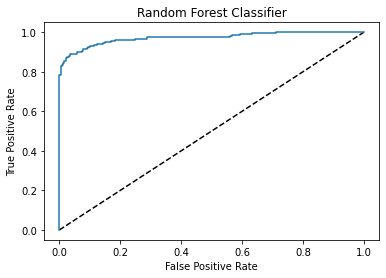

In [15]:
#plotting roc curves
plt.plot([0,1],[0,1],'k--')  #([x-axis],[y-axis],broken lines)
plt.plot(fpr,tpr,label='Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

AUC curve is fine

# Saving the model

In [16]:
import joblib as jb
jb.dump(best,"Best.pkl")

['Best.pkl']

Stored data in .pkl file

# Conclusion

In [18]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
HR=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
HR

,Original:,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
612,0,0
613,0,0
614,1,1
615,1,1


Original and predicted data are same